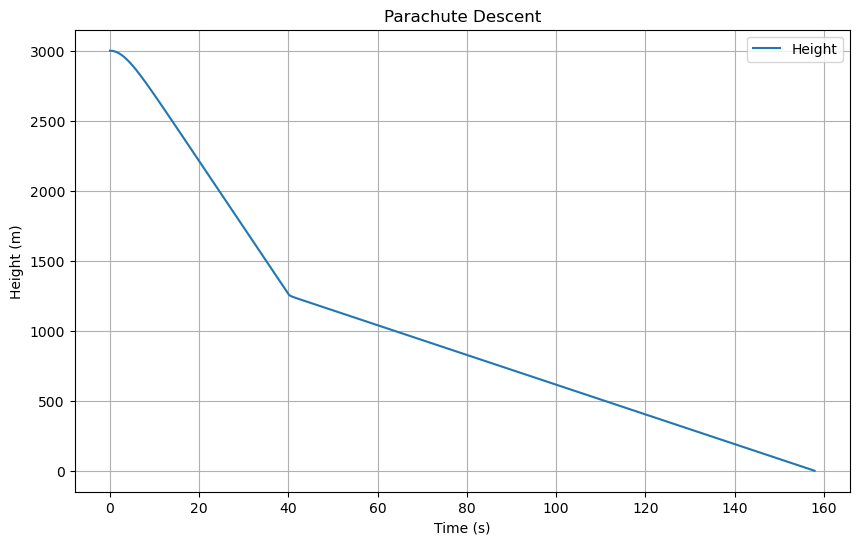

In [5]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8  # Acceleration due to gravity (m/s^2)
m1 = 100  # Mass of parachutist (kg)
m2 = 15  # Mass of equipment (kg)
k1 = 0.5  # Air resistance coefficient during free fall (kg/m)
k2 = 10  # Air resistance coefficient after parachute is extended (kg/m)
h0 = 3000  # Initial altitude (m)
tg = 40  # Time when parachute is extended (s)

# Time step and total time
dt = 0.1  # Time step (s)
total_time = 200  # Total simulation time (s)

# Initialize arrays to store time, velocity, and height
time = np.zeros(int(total_time / dt) + 1)
velocity = np.zeros(int(total_time / dt) + 1)
height = np.zeros(int(total_time / dt) + 1)

# Initial conditions
time[0] = 0
velocity[0] = 0
height[0] = h0

# Euler's method
for i in range(len(time) - 1):
    time[i + 1] = time[i] + dt

    # Determine air resistance coefficient based on the time
    if time[i] < tg:
        k = k1
    else:
        k = k2

    # Update velocity and height using Euler's method
    acceleration = g - k / (m1 + m2) * velocity[i]**2
    velocity[i + 1] = velocity[i] + dt * acceleration
    height[i + 1] = height[i] - dt * velocity[i]

    # Stop simulation if height becomes less than or equal to zero
    if height[i + 1] <= 0:
        break

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(time[:i + 2], height[:i + 2], label='Height')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Parachute Descent')
plt.legend()
plt.grid(True)
plt.show()